<a href="https://colab.research.google.com/github/sekarpdkt/Building-a-Conversational-Chatbot-for-Slack-using-Rasa-and-Python/blob/master/Gen_AI_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Any One Can Code: Unleashing the NLP Chef in You** 👩‍🍳

**Using GPU:** Enhancing Your Cooking Power
Now, imagine you have the option to cook your NLP masterpiece on a regular stovetop or on a high-performance, state-of-the-art induction cooktop. The regular stovetop is like your CPU (Central Processing Unit), handling the cooking tasks one by one. However, if you switch to the induction cooktop, which is akin to using a GPU (Graphics Processing Unit), you can cook multiple dishes simultaneously, speeding up the entire process.

To use GPU , kindly click on `Runtime` , navigate to `change runtime` , chooose `Hardware accelerator` to be `T4 GPU` and save .

Click on `Connect/Reconnect` on right hand side!


## 🔥 **Introduction: Setting the Kitchen**

Step into the bustling kitchen of Natural Language Processing (NLP) with pots simmering, ingredients waiting to be transformed, and the aroma of possibilities lingering in the air. Today, we're not just cooking; we're unleashing the NLP chef within each one of you.

Like we set up the kitchen before cooking we need to 'install' necessary python packages before training !

In [ ]:
# Run only if you are cooking this recipe (executing this notebook) for the first time

!pip install nltk datasets evaluate rouge_score sentencepiece transformers accelerate
!pip install datasets
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=d13fa17a3fcbe6c0ffa133aa1b8cfa7c84838e88235ddcb6c496357c27380241
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


##🌐 Meet the Star Ingredient: Flan T5 Model

Before we dive into the cooking process, let's meet our star ingredient - the Flan T5 model. Flan T5 is like the secret sauce of the NLP world, known for its versatility and power.

**Understanding the Magic: Prompt-Based Interaction**

Just like a chef interprets a recipe, Flan T5 understands and generates text based on prompts. A prompt is a command or query you give to the model to get specific responses. It's the secret language that allows us to communicate with our NLP creation.

Just as a chef picks a culinary style, you select the architecture of your NLP model. Today, we're choosing the illustrious `google/flan-t5-base model`. It's like deciding to prepare a signature dish known for its unique blend of flavors.

In [ ]:
model_id="google/flan-t5-base" # name of the model to be downloaded.

In [ ]:
# Interacting with the Flan T5 model using a prompt
from transformers import T5ForConditionalGeneration, T5Tokenizer


flan_t5_model = T5ForConditionalGeneration.from_pretrained(model_id)
tokenizer = T5Tokenizer.from_pretrained(model_id)

# Example prompt
prompt = "Translate the following English text to French: 'Hello, how are you?'"

# Encoding the prompt
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generating the response
output = flan_t5_model.generate(input_ids)

# Decoding and printing the response
response = tokenizer.decode(output[0], skip_special_tokens=True)
print("Flan T5 Response:", response)


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Flan T5 Response: 'Hello, c'est-à-dire?'


**Use Cases: A Swiss Army Knife for NLP**


Flan T5 is like a Swiss Army knife in the NLP kitchen. It can perform various tasks, from translation to summarization and beyond. Its adaptability makes it a valuable tool for a wide range of applications.

- **Translation:** Turn it into a language maestro, effortlessly translating text from one language to another.
- **Summarization:** Transform it into a master storyteller, condensing lengthy texts into concise summaries.
- **Question Answering:** Watch it become an expert in answering questions, extracting valuable information from a sea of data.


**The Power of Large Language Models: Beyond Imagination**


Now, imagine the capabilities of large language models like Flan T5. These models are not just language maestros; they're like wizards that can even generate code. With their extensive training on diverse datasets, they become fluent in the language of programming.

Now that we've had a taste of the Flan T5 model's capabilities, let's roll up our sleeves and dive into the process of training and fine-tuning, just like a chef perfecting a signature dish. We'll use the rich yahoo_answers_qa dataset as our main ingredient and the powerful Hugging Face Transformers library as our culinary tools. Get ready to cook up an NLP masterpiece! 🍽️

## 📜 **Recipe Book: Understanding the Hugging Face Cookbook**

Just like a chef follows a recipe to create a masterpiece, in the NLP kitchen, we have the Hugging Face Cookbook. It's filled with incredible recipes to train NLP models and bring words to life.

Lets import them first!

In [ ]:
import nltk
import evaluate
import numpy as np
from datasets import load_dataset
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer
import datasets

### **Ingredients (Data):**

Your dataset is the foundation, much like quality ingredients in a dish. Today our dataset/ingredient is `yahoo_answer_qa`


In [ ]:
# Importing necessary libraries
from datasets import load_dataset
import datasets

data_set_name = "yahoo_answers_qa"
# Loading a small sample from the Yahoo Answers QA dataset
yahoo_answers_qa = load_dataset( data_set_name,split="train[:150]")  # Taking a small sample 150 examples for demonstration
# loading
yahoo_answers_qa_eval = load_dataset(data_set_name,split=datasets.ReadInstruction(
    'train', from_=2, to=2.5, unit='%'))

Generating train split:   0%|          | 0/87362 [00:00<?, ? examples/s]

In [ ]:
yahoo_answers_qa

Dataset({
    features: ['id', 'question', 'answer', 'nbestanswers', 'main_category'],
    num_rows: 150
})

In [ ]:
yahoo_answers_qa[9]

{'id': '1274254',
 'question': 'How to boil lobster?',
 'answer': 'Fill a large pot with 1/4 full of water or just enough to cover your lobster and add a generous handful of salt. When it comes to a boil, put the lobster in the pot head first. Then boil for 18 for the first pound and 10 minutes more for each additional pound.  For lobsters over 7 pounds, 8 minutes per additional pound is enough.',
 'nbestanswers': ['Fill a large pot with 1/4 full of water or just enough to cover your lobster and add a generous handful of salt. When it comes to a boil, put the lobster in the pot head first. Then boil for 18 for the first pound and 10 minutes more for each additional pound.  For lobsters over 7 pounds, 8 minutes per additional pound is enough.',
  "Here's how:. . You'll need the following:. . large deep pot. long tongs. live lobsters. boiling salted water. melted butter. . Bring salted water to a rolling boil. Using long tongs, quickly but carefully lower live lobsters into the boiling w

In [ ]:
questions = ["What happened to the missing 18.5 minutes on the Watergate tapes?","Why hybrid cars gas mileage is better in city ?","What is the meaning of life?","How to boil lobster?"] # remember this question

### 🤖 **The Hugging Face Pan** : Transformers as Cooking Tools

Our special pan in the NLP kitchen is the Hugging Face Transformers library. It's like having a magic wand that speaks the language of models. Think of it as selecting the perfect pan for your culinary creation, but in the digital realm.

#### **Cooking Techniques (Training Steps):** Every step in the recipe is a technique. From tokenization to fine-tuning, each contributes to the richness of your NLP model.

In [ ]:
# Importing necessary libraries
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer
# Tokenizing and preparing the dataset
tokenizer = T5Tokenizer.from_pretrained(model_id)
model = T5ForConditionalGeneration.from_pretrained(model_id)
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### **STEP 1: Connecting the Ingredients: Data Preprocessing**

Before the grand cooking begins, a chef preps the ingredients. In NLP, we preprocess the data, akin to chopping, slicing, and dicing for perfect integration. For this special recipe, we've chosen the rich and diverse yahoo_answers_qa dataset as our main ingredient.

In [ ]:
# We prefix our tasks with "answer the question"
prefix = "Please answer this question: "

# Define the preprocessing function

def preprocess_function(examples):
   """Add prefix to the sentences, tokenize the text, and set the labels"""
   # The "inputs" are the tokenized answer:
   inputs = [prefix + doc for doc in examples["question"]]
   model_inputs = tokenizer(inputs, max_length=128, truncation=True)

   # The "labels" are the tokenized outputs:
   labels = tokenizer(text_target=examples["answer"],
                      max_length=512,
                      truncation=True)

   model_inputs["labels"] = labels["input_ids"]
   return model_inputs

In [ ]:
# Map the preprocessing function across our dataset
train_tokenized_dataset = yahoo_answers_qa.map(preprocess_function, batched=True)

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

In [ ]:
eval_tokenized_dataset = yahoo_answers_qa_eval.map(preprocess_function, batched=True)

Map:   0%|          | 0/437 [00:00<?, ? examples/s]

#### **STEP 1.1: Tokenization**

The Art of Ingredient Preparation Tokenization is like preparing your ingredients before cooking. In NLP, it involves breaking down text into smaller units called tokens. This step is crucial because it helps the model understand only numbers and process language more effectively.

In [ ]:
# Tokenizing a text example
print(questions[0])
encoded = tokenizer.encode(questions[0])
print(encoded)


What happened to the missing 18.5 minutes on the Watergate tapes?
[363, 2817, 12, 8, 3586, 209, 19253, 676, 30, 8, 2336, 5339, 4874, 7, 58, 1]


In [ ]:
tokenizer.decode(encoded,skip_special_tokens=True)

'What happened to the missing 18.5 minutes on the Watergate tapes?'

### **STEP 2: 🔍 Understanding the Recipe: Evaluation Metrics**

In the culinary world, just as we taste and evaluate our dish, in NLP, we use metrics to assess the performance of our models. One such metric is the Rouge metric which we normally use for Question and Answering Tasks

In [ ]:
nltk.download("punkt", quiet=True)
metric = evaluate.load("rouge")

In [ ]:
def compute_metrics(eval_preds):
   preds, labels = eval_preds

   # decode preds and labels
   labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
   decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
   decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

   # rougeLSum expects newline after each sentence
   decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
   decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

   result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

   return result

### **STEP 3: Initial Tasting: Inference Without Training**

Inference Without Training
Before we delve into the cooking process, let's take a sneak peek. We'll perform an initial inference on a small sample from the dataset to showcase the need for training.

In [ ]:
# Initial inference example
for question in questions:
  inputs = tokenizer(question, return_tensors="pt")
  outputs = model.generate(**inputs,max_new_tokens=512)
  answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
  print(f"Answer for question \" {question} \" without Training the model is :", answer)

Answer for question " What happened to the missing 18.5 minutes on the Watergate tapes? " without Training the model is : re-aired
Answer for question " Why hybrid cars gas mileage is better in city ? " without Training the model is : hybrid cars have a higher mileage
Answer for question " What is the meaning of life? " without Training the model is : life is a cycle of life
Answer for question " How to boil lobster? " without Training the model is : Place lobster in a large pot and bring to a boil. Add the water and bring to a simmer. Reduce the heat to low and simmer for 10 minutes.


### **STEP 4: The Need for Training : Unleashing the Full Flavor**


Our initial inference was a taste of what the untrained model can offer. However, to unlock the full flavor and potential of our NLP creation, we need to go through the training process.

In [ ]:
# Global Parameters
L_RATE = 3e-4
BATCH_SIZE = 16
PER_DEVICE_EVAL_BATCH = 16
WEIGHT_DECAY = 0.01
SAVE_TOTAL_LIM = 3
NUM_EPOCHS = 3

#### **1. L_RATE (Learning Rate):**
It determines the size of steps the optimizer takes during training to find the optimal model parameters. Too high a learning rate might cause the model to overshoot the optimal values, and too low might make the training slow or get stuck in local minima.
##### **Analogy:**
Think of it as the intensity of the flame under your cooking pot. Too high, and your dish might burn; too low, and it may not cook properly.

#### **2. BATCH_SIZE:**
It is the number of data samples used in one iteration of training. It affects the efficiency of the training process and memory usage.
##### **Analogy:**
Picture it as the number of servings in each cooking round. A larger batch means cooking for more people in one go, but it might require a larger pot.

#### **3. PER_DEVICE_EVAL_BATCH:**
This parameter specifies the batch size used during evaluation on each device. It helps balance memory usage during model evaluation.
##### **Analogy:**
When tasting a dish, you might want to evaluate a small portion rather than the entire serving. This parameter controls the size of each "tasting portion."

#### **4. WEIGHT_DECAY:**
It is a regularization technique that prevents the model from becoming too complex and overfitting the training data.
##### **Analogy:**
It's like adding a pinch of salt to your dish – just enough to enhance the flavor without making it too salty.

#### **5. SAVE_TOTAL_LIM (Save Total Limit):**
This parameter sets a limit on the total number of checkpoints saved during training. It helps manage storage space.
##### **Analogy:**
Imagine you're taking snapshots of your dish at different stages of cooking. This parameter decides how many pictures you keep to avoid filling up your photo album.

#### **6. NUM_EPOCHS (Number of Epochs):**
It is one complete pass through the entire training dataset. The number of epochs determines how many times the model sees the entire dataset during training.
##### **Analogy:**
It's akin to repeating a recipe multiple times to perfect your culinary skills. More epochs allow the model to learn and refine its understanding.



### **STEP 5: Building the Recipe: Configuring the Model**

In [ ]:
# Set up training arguments
training_args = Seq2SeqTrainingArguments(
   output_dir="./results",
   evaluation_strategy="epoch",
   save_strategy="epoch",
   learning_rate=L_RATE,
   per_device_train_batch_size=BATCH_SIZE,
   per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH,
   weight_decay=WEIGHT_DECAY,
   save_total_limit=SAVE_TOTAL_LIM,
   logging_steps= 1,
   num_train_epochs=NUM_EPOCHS,
   predict_with_generate=True,
   push_to_hub=False,
   load_best_model_at_end=True,
   report_to="tensorboard",
)

In [ ]:
trainer = Seq2SeqTrainer(
   model=model,
   args=training_args,
   train_dataset=train_tokenized_dataset,
   eval_dataset=eval_tokenized_dataset,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

### **STEP 6: Into the Oven: Model Training**

With the unique combination of our selected model, dataset, and advanced tools, it's time to put our creation into the digital oven.


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,3.194000,3.227328,0.171157,0.030902,0.133508,0.150573
2,2.961400,3.224342,0.170758,0.030287,0.131732,0.150539
3,2.543600,3.226711,0.173906,0.032957,0.134402,0.153490


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


TrainOutput(global_step=30, training_loss=3.1642261266708376, metrics={'train_runtime': 181.7724, 'train_samples_per_second': 2.476, 'train_steps_per_second': 0.165, 'total_flos': 18718484189184.0, 'train_loss': 3.1642261266708376, 'epoch': 3.0})

### **STEP 7: 🌈 Knowing When to Stop: The Art of Culinary Timing**

As we venture further into the NLP kitchen, it's crucial to know when our creation is perfectly cooked. Training an NLP model is akin to crafting a culinary masterpiece; timing is everything. But how do you know when to stop?

**Monitoring Loss Function: A Kitchen Thermometer**


Think of the loss function as a thermometer in your culinary journey. It measures how far off your model's predictions are from the actual values. During training, we aim to minimize this loss, ensuring our model captures the essence of the language.


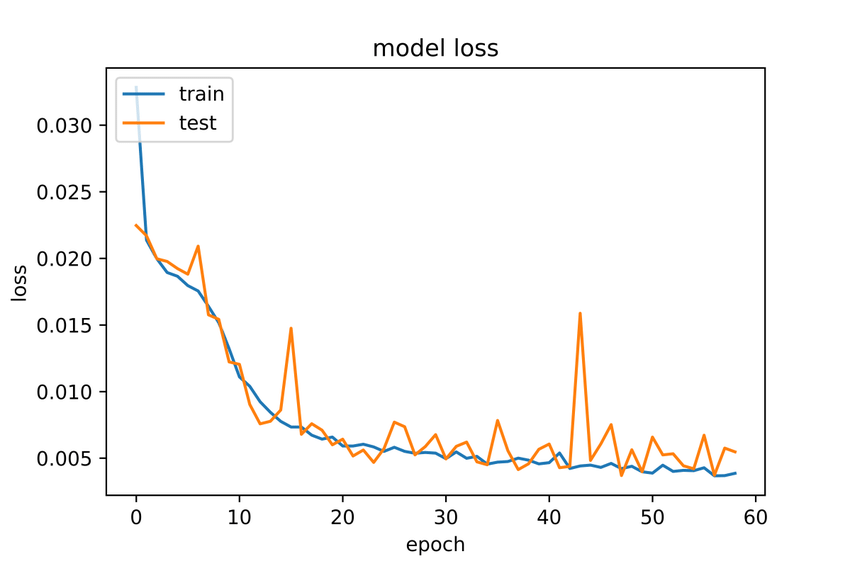

**Convergence: When the Flavors Harmonize**


Loss function convergence is like achieving the perfect blend of flavors in your dish. It indicates that your model has learned as much as it can from the data. Monitoring loss over epochs helps you identify when your model has reached its peak performance.

## **🎉 Bon Appétit: Deploying Your Model**

Congratulations! You've successfully cooked up an exquisite NLP model. Now, it's time to share your creation with the world.

In [ ]:
# Saving the model for deployment
model_path = "./flan_t5_deployable_model"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('./flan_t5_deployable_model/tokenizer_config.json',
 './flan_t5_deployable_model/special_tokens_map.json',
 './flan_t5_deployable_model/spiece.model',
 './flan_t5_deployable_model/added_tokens.json')

## **🌟The Finished Dish: Model Evaluation**

Just like a chef tastes the dish before serving, we evaluate our NLP model. Does it capture the essence of the language? Is it flavorful and precise?

In [ ]:
finetuned_model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(model_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
for question in questions:
  prompt = "Please answer to this question: " + question
  print(f"question : "  + question)
  inputs = tokenizer(prompt, return_tensors="pt")
  outputs = finetuned_model.generate(**inputs,max_new_tokens=512)
  answer = tokenizer.decode(outputs[0],skip_special_tokens=True)
  print(f"answer: "  +answer)

question : What happened to the missing 18.5 minutes on the Watergate tapes?
answer: The tapes were re-issued in the United States and the tapes were recovered.
question : Why hybrid cars gas mileage is better in city ?
answer: Hybrid cars are more efficient than conventional cars. They are more fuel efficient and have a lower noise level.
question : What is the meaning of life?
answer: Life is a symbiotic relationship between the body and the soul. It is a universal bond between the body and the soul.
question : How to boil lobster?
answer: You can boil lobster in a pot of water, but you can also use a pot of water.


### **Appendix**

1. what is Flan T5 model ?  -->  https://blog.research.google/2021/10/introducing-flan-more-generalizable.html
2. How to download the model ? --> from  https://huggingface.co/google/flan-t5-base using transfomers library
3. How to train the model ? --> using transformers library
